### Property Recommendation System

In [79]:
import numpy as np
import pandas as pd
import json
import warnings
warnings.filterwarnings("ignore")

In [80]:
with open('appraisals_dataset.json', 'r') as f:
    data = pd.read_json(f)
print("Data shape:", data.shape)
print("Data head:\n", data.head())

Data shape: (88, 1)
Data head:
                                           appraisals
0  {'orderID': '4762597', 'subject': {'address': ...
1  {'orderID': '4762739', 'subject': {'address': ...
2  {'orderID': '4763065', 'subject': {'address': ...
3  {'orderID': '4763086', 'subject': {'address': ...
4  {'orderID': '4763087', 'subject': {'address': ...


In [3]:
df = pd.json_normalize(data['appraisals'].tolist())
df.to_csv('appraisals.csv', index=False)
df = pd.read_csv('appraisals.csv')
display(df.head())

,orderID,comps,properties,subject.address,subject.subject_city_province_zip,subject.effective_date,subject.municipality_district,subject.site_dimensions,subject.lot_size_sf,subject.units_sq_ft,...,subject.room_count,subject.num_beds,subject.room_total,subject.main_lvl_area,subject.second_lvl_area,subject.third_lvl_area,subject.gla,subject.subject_age,subject.num_baths,subject.condition
0,4762597,"[{'distance_to_subject': '0.15 KM', 'prop_type...","[{'id': 367, 'address': '463 Conservatory Dr',...",142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",Apr/11/2025,Kingston,Condo Common Property,NaN,SqFt,...,6.0,3,6.0,522,522.0,NaN,1044,49,1:1,Average
1,4762739,"[{'distance_to_subject': '3.73 KM', 'prop_type...","[{'id': 297301, 'address': '638 Myers Point Ro...",7180 207 HWY Halifax NS B0J2L0,"West Chezzetcook, NS B0J2L0",Apr/17/2025,Halifax Regional Municipality - West Chezzetcook,See Schedule A and or Plot Map,72745+/-SqFt,SqFt,...,6.0,3,6.0,1060,440.0,NaN,1500 SqFt,14+/-yrs,2:1,Average
2,4763065,"[{'distance_to_subject': '0.31 KM', 'prop_type...","[{'id': 116134, 'address': '246 Waterbrook Lan...",11 PAUL AVE Ayr ON N0B1E0,Ayr ON N0B1E0,May/01/2025,"Township of North Dumfries, Region of Waterloo",131' x 154',20174 SqFt,SqFt,...,9.0,4,9.0,1660,1340.0,NaN,3000 SqFt,42,2:1,Average
3,4763086,"[{'distance_to_subject': '0.78 KM', 'prop_type...","[{'id': 1849, 'address': '501 CLOTHIER Street ...",102 Stonewalk Dr Kemptville ON K0G 1J0,Kemptville ON K0G 1J0,Apr/15/2025,"North Grenville, Ontario",176.38 F x Irregular,1.25 Acres,Acres,...,5.0,2,5.0,NaN,NaN,NaN,1283 SqFt,2012 +/-,3:0,Good
4,4763087,"[{'distance_to_subject': '0.00 KM', 'prop_type...","[{'id': 293769, 'address': '3 Apollo Court', '...",407 105 Dunbrack St Halifax NS B3M3G7,Halifax NS B3M3G7,Apr/17/2025,Halifax Regional Municipality - Halifax,CONDO - N/A,NaN,NaN,...,6.0,3,6.0,1530,NaN,NaN,1530 SqFt,47+/-yrs,2:0,Average


In [4]:
print("\n DataFrame info:")
df.info()
print("/nFirst 5 rows of the DataFrame:")
df.head()
print("\nDataFrame shape:", df.shape)
print("\nDataFrame columns:", df.columns)
print("\n Missing values count")
print(df.isnull().sum())



 DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   orderID                            88 non-null     int64  
 1   comps                              88 non-null     object 
 2   properties                         88 non-null     object 
 3   subject.address                    88 non-null     object 
 4   subject.subject_city_province_zip  88 non-null     object 
 5   subject.effective_date             88 non-null     object 
 6   subject.municipality_district      87 non-null     object 
 7   subject.site_dimensions            88 non-null     object 
 8   subject.lot_size_sf                78 non-null     object 
 9   subject.units_sq_ft                83 non-null     object 
 10  subject.year_built                 87 non-null     object 
 11  subject.structure_type             87 non-

In [5]:
with open('appraisals_dataset.json', 'r') as f:
    data = pd.read_json(f)  
print("Initial data shape:", data.shape)
print("\n Columns in the dataset:", data.columns.tolist())
sample_apprasial = data['appraisals'][0]
print(json.dumps(sample_apprasial, indent=2)[:500]+"...")

normalized_df = pd.json_normalize(data['appraisals'])
print("\n Normalized DataFrame shape:", normalized_df.shape)
print("\n Normalized DataFrame columns:", normalized_df.columns.tolist()[:10],"...")

numeric_cols = normalized_df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    try:
        normalized_df[col] = pd.to_numeric(normalized_df[col], errors='ignore')
    except:
        pass

missing_data = normalized_df.isnull().sum()
missing_values = missing_data.sum()
print("\n Total missing values in the DataFrame:", missing_values)

display(missing_data[missing_data > 0])
display(normalized_df.head())


Initial data shape: (88, 1)

 Columns in the dataset: ['appraisals']
{
  "orderID": "4762597",
  "subject": {
    "address": "142-950 Oakview Ave Kingston ON K7M 6W8",
    "subject_city_province_zip": "\"Twin Oak Meadows\"",
    "effective_date": "Apr/11/2025",
    "municipality_district": "Kingston",
    "site_dimensions": "Condo Common Property",
    "lot_size_sf": "n/a",
    "units_sq_ft": "SqFt",
    "year_built": "1976",
    "structure_type": "Townhouse",
    "roofing": "Asphalt Shingle",
    "effective_age": "25",
    "style": "2 Storey",
    "construction"...

 Normalized DataFrame shape: (88, 38)

 Normalized DataFrame columns: ['orderID', 'comps', 'properties', 'subject.address', 'subject.subject_city_province_zip', 'subject.effective_date', 'subject.municipality_district', 'subject.site_dimensions', 'subject.lot_size_sf', 'subject.units_sq_ft'] ...

 Total missing values in the DataFrame: 155


subject.municipality_district       1
subject.units_sq_ft                 1
subject.year_built                  1
subject.structure_type              1
subject.roofing                     1
subject.effective_age               1
subject.construction                1
subject.remaining_economic_life     1
subject.windows                     1
subject.exterior_finish             1
subject.basement_area               1
subject.foundation_walls            1
subject.flooring                    1
subject.plumbing_lines              1
subject.heating                     1
subject.fuel_type                   1
subject.water_heater                1
subject.cooling                     1
subject.room_count                  1
subject.num_beds                    1
subject.room_total                  1
subject.main_lvl_area               1
subject.second_lvl_area            45
subject.third_lvl_area             87
subject.num_baths                   1
dtype: int64

,orderID,comps,properties,subject.address,subject.subject_city_province_zip,subject.effective_date,subject.municipality_district,subject.site_dimensions,subject.lot_size_sf,subject.units_sq_ft,...,subject.room_count,subject.num_beds,subject.room_total,subject.main_lvl_area,subject.second_lvl_area,subject.third_lvl_area,subject.gla,subject.subject_age,subject.num_baths,subject.condition
0,4762597,"[{'distance_to_subject': '0.15 KM', 'prop_type...","[{'id': 367, 'address': '463 Conservatory Dr',...",142-950 Oakview Ave Kingston ON K7M 6W8,"""Twin Oak Meadows""",Apr/11/2025,Kingston,Condo Common Property,n/a,SqFt,...,6.0,3,6.0,522,522.0,NaN,1044,49,1:1,Average
1,4762739,"[{'distance_to_subject': '3.73 KM', 'prop_type...","[{'id': 297301, 'address': '638 Myers Point Ro...",7180 207 HWY Halifax NS B0J2L0,"West Chezzetcook, NS B0J2L0",Apr/17/2025,Halifax Regional Municipality - West Chezzetcook,See Schedule A and or Plot Map,72745+/-SqFt,SqFt,...,6.0,3,6.0,1060,440.0,NaN,1500 SqFt,14+/-yrs,2:1,Average
2,4763065,"[{'distance_to_subject': '0.31 KM', 'prop_type...","[{'id': 116134, 'address': '246 Waterbrook Lan...",11 PAUL AVE Ayr ON N0B1E0,Ayr ON N0B1E0,May/01/2025,"Township of North Dumfries, Region of Waterloo",131' x 154',20174 SqFt,SqFt,...,9.0,4,9.0,1660,1340.0,NaN,3000 SqFt,42,2:1,Average
3,4763086,"[{'distance_to_subject': '0.78 KM', 'prop_type...","[{'id': 1849, 'address': '501 CLOTHIER Street ...",102 Stonewalk Dr Kemptville ON K0G 1J0,Kemptville ON K0G 1J0,Apr/15/2025,"North Grenville, Ontario",176.38 F x Irregular,1.25 Acres,Acres,...,5.0,2,5.0,,NaN,NaN,1283 SqFt,2012 +/-,3:0,Good
4,4763087,"[{'distance_to_subject': '0.00 KM', 'prop_type...","[{'id': 293769, 'address': '3 Apollo Court', '...",407 105 Dunbrack St Halifax NS B3M3G7,Halifax NS B3M3G7,Apr/17/2025,Halifax Regional Municipality - Halifax,CONDO - N/A,N/A,N/A,...,6.0,3,6.0,1530,NaN,NaN,1530 SqFt,47+/-yrs,2:0,Average


In [6]:
normalized_df.describe()

,orderID,subject.room_count,subject.room_total,subject.second_lvl_area,subject.third_lvl_area
count,8.800000e+01,87.000000,87.000000,43.000000,1.0
mean,4.765229e+06,7.080460,7.172414,839.868372,300.0
std,8.840239e+03,1.918202,1.989548,402.985942,NaN
min,4.723364e+06,4.000000,4.000000,138.000000,300.0
25%,4.759562e+06,6.000000,6.000000,624.000000,300.0
50%,4.763752e+06,7.000000,7.000000,770.000000,300.0
75%,4.771735e+06,8.000000,8.000000,982.955000,300.0
max,4.779669e+06,15.000000,15.000000,2294.000000,300.0


In [7]:
print("Number of columns in normalized_df:", normalized_df.shape[1])

Number of columns in normalized_df: 38


In [8]:
normalized_df.columns

Index(['orderID', 'comps', 'properties', 'subject.address',
       'subject.subject_city_province_zip', 'subject.effective_date',
       'subject.municipality_district', 'subject.site_dimensions',
       'subject.lot_size_sf', 'subject.units_sq_ft', 'subject.year_built',
       'subject.structure_type', 'subject.roofing', 'subject.effective_age',
       'subject.style', 'subject.construction',
       'subject.remaining_economic_life', 'subject.windows',
       'subject.basement', 'subject.exterior_finish', 'subject.basement_area',
       'subject.foundation_walls', 'subject.flooring',
       'subject.plumbing_lines', 'subject.heating', 'subject.fuel_type',
       'subject.water_heater', 'subject.cooling', 'subject.room_count',
       'subject.num_beds', 'subject.room_total', 'subject.main_lvl_area',
       'subject.second_lvl_area', 'subject.third_lvl_area', 'subject.gla',
       'subject.subject_age', 'subject.num_baths', 'subject.condition'],
      dtype='object')

In [9]:
done = ['orderID', 'comps', 'properties', 'subject.heating', 'subject.address','subject.foundation_walls',
       'subject.subject_city_province_zip', 'subject.effective_date','subject.municipality_district','subject.site_dimensions',
       'subject.lot_size_sf', 'subject.units_sq_ft','subject.exterior_finish',   'subject.condition',  'subject.flooring',
       'subject.subject_age', 'subject.num_baths','subject.windows','subject.fuel_type','subject.plumbing_lines',
       'subject.num_beds','subject.main_lvl_area','subject.roofing', 'subject.basement', 
       'subject.second_lvl_area','subject.third_lvl_area','subject.construction','subject.cooling', 
       'subject.gla','subject.room_total', 'subject.effective_age', 'subject.water_heater','subject.style', 
       'subject.room_count','subject.structure_type','subject.remaining_economic_life','subject.basement_area','subject.year_built',]

remaining = [     
        
       
      ]
print(len(done))
print(len(remaining))

38
0


## Data Pre-Processing

In [10]:
import re
def parse_lot_size_sf(lot_size):
    if pd.isna(lot_size):
        return np.nan
    lot_size = lot_size.lower().strip()
    if any(x in lot_size.lower() for x in ['n/a','na','nan']):
        return np.nan
    value = lot_size.replace('+/-','')
    match = re.search(r"([\d.]+)", value)
    if not match:
        return np.nan
    number = float(match[0])
    if any(x in value for x in ['acres', 'acre','ac']):
        return number * 43560
    elif any(x in value for x in ['sqm','sq m']):
        return number * 10.7639
    elif any(x in value for x in ['sqft']):
        return number
    else:
        return np.nan  

normalized_df['subject.lot_size_sf_parsed'] = normalized_df['subject.lot_size_sf'].apply(parse_lot_size_sf)

print("\n After parsing site dimensions:")
print(normalized_df['subject.lot_size_sf_parsed'].unique())
normalized_df['subject.lot_size_sf_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.lot_size_sf_parsed'].isnull()]['subject.lot_size_sf_parsed'].unique())



 After parsing site dimensions:
[           nan 7.27450000e+04 2.01740000e+04 5.44500000e+04
 6.82500000e+03 3.69400000e+03 3.35800000e+03 5.90938110e+03
 4.24950000e+04 2.61900000e+03 2.67000000e+04 5.00000000e+00
 3.39430000e+04 5.98700000e+03 4.38082920e+05 1.74200000e+03
 3.25000000e+03 4.05799030e+03 4.63924090e+03 6.51215950e+03
 3.60100000e+03 3.55208700e+03 1.86800000e+03 6.73820140e+03
 8.19132790e+03 1.26000000e+04 3.25300000e+03 3.36610000e+04
 4.92986620e+03 3.73740000e+04 1.59360000e+04 3.13700000e+03
 6.30000000e+03 1.43750000e+04 3.50000000e+03 1.42320000e+04
 6.00000000e+03 9.11000000e+02 8.39800000e+03 6.45200000e+03
 7.54100000e+03 7.00000000e+00 1.05700000e+04 3.00000000e+00
 6.00000000e+00 2.89900000e+03 2.78000000e+03 5.31432000e+04
 7.05900000e+03 6.48000000e+03 4.47778240e+03 2.74479450e+03
 3.57361480e+03 4.10104590e+03 3.70278160e+03 2.17800000e+04
 1.00211909e+04 2.17800000e+05 2.30460000e+04 1.00000000e+01
 9.45070420e+03 7.52396610e+03 4.76800000e+03 4.9190

In [11]:
normalized_df['subject.site_dimensions'].unique()

array(['Condo Common Property', 'See Schedule A and or Plot Map',
       "131' x 154'", '176.38 F x Irregular', 'CONDO - N/A',
       "26.36' x 140.17'", "42' x 84'", 'CONDO - NOT APPLICABLE',
       '14.30 m x 38.40 m', "24.96' x 104.92'", 'Unknown',
       "61.29' x Irregular", '50.00 x 119.75', "325.95' x IRR",
       '24.66 x 84.03', '13.25m x33.99m', 'See Plot Map', '605',
       '36.09 F x 99.74 F', 'Common Property', '330', '20.34 x 91.86',
       '19.55 x 39.58', 'Condominium property-as per deed', "34' x 102'",
       '36.09 Ft x 86.94 Ft', '13.18 F x Irregular',
       '41.39 F x Irregular', 'Condo n/a', "41.31' x Irr",
       "47.5' x 135.83'", 'n/a condo', "101.7' x 68.9'", '75 x irregular',
       "35.10' x 104.99'", "52' x 132'", '29.46 F x 98.42 F',
       '33.27x Irr', 'Condominium Property', "101.39' x 527'",
       '72.7 x Irregular', "54' x 120'", 'N/A Condominium',
       '13.72m x 29.87m', '7.72m x 33.0m', '10.36m x 31.99m',
       '11.71 m x 32.56 m', '9.7 m x 35.

In [12]:
def parse_site_dimensions(dimension):
    if pd.isna(dimension):
        return np.nan
    dimension = str(dimension).strip().lower()
    if any(x in dimension for x in ['condo','common property', 'see','n/a','unknown','not applicable']):
        return np.nan
    try:
        if dimension.replace('.','',1).isdigit():
            return float(dimension)
        if 'acre' in dimension:
            acres = float(dimension.split()[0])
            return acres * 43560
        
        dims = dimension.replace("'",'').replace('"','').replace('ft','').replace('f','')
        dims = dims.replace('x',' ').replace('X',' ').replace('by',' ')
        dims = dims.replace('m','').replace('irregular','').replace('irr','')
        dims = dims.strip().split()
        if len(dims) >= 2:

            length = float(dims[0])
            width = float(dims[1])
            if any(x in dimension.lower() for x in ['m','metre', 'meter']):
                length = length * 3.28084
                width = width * 3.28084
            return length * width
    except:
        return np.nan

    return
normalized_df['subject.site_dimensions_parsed'] = normalized_df['subject.site_dimensions'].apply(parse_site_dimensions)

print("\n After parsing site dimensions:")
print(normalized_df['subject.site_dimensions_parsed'].unique())
normalized_df['subject.site_dimensions_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.site_dimensions_parsed'].isnull()]['subject.site_dimensions'].unique())


 After parsing site dimensions:
[           nan 2.01740000e+04 3.69488120e+03 3.52800000e+03
 5.91067887e+03 2.61880320e+03 5.98750000e+03 2.07217980e+03
 4.84771573e+03 6.05000000e+02 3.59961660e+03 3.30000000e+02
 1.86843240e+03 7.73789000e+02 3.46800000e+03 3.13766460e+03
 6.45192500e+03 7.00713000e+03 3.68514900e+03 6.86400000e+03
 2.89945320e+03 5.34325300e+04 6.48000000e+03 4.41122730e+03
 2.74221399e+03 3.56733667e+03 4.10403819e+03 3.70655279e+03
 1.00642569e+04 2.17800000e+05 2.30460000e+04 8.63719740e+03
 9.44804450e+03 3.35434470e+03 5.66235544e+03 4.91740800e+03
 6.24098132e+03 5.76400000e+03 3.62595000e+03 4.89285958e+03
 5.82646203e+03 4.39236942e+05]

 Values that counlent be parsed
['Condo Common Property' 'See Schedule A and or Plot Map'
 '176.38 F x Irregular' 'CONDO - N/A' 'CONDO - NOT APPLICABLE' 'Unknown'
 "61.29' x Irregular" "325.95' x IRR" 'See Plot Map' 'Common Property'
 'Condominium property-as per deed' '13.18 F x Irregular'
 '41.39 F x Irregular' 'Condo n/

In [13]:
normalized_df['subject.lot_size_sf'].unique()

array(['n/a', '72745+/-SqFt', '20174 SqFt', '1.25 Acres', 'N/A',
       '6825 SqFt', '3694 SqFt', '3358 SqFt', '549 SqM', '42495 SqFt',
       '2619 SqFt', '26700 SqFt', '5,663 SqFt', '33943+/-SqFt',
       '5987 SqFt', '10.057 Acres', '1742 SqFt', '3250 SqFt', '377 SqM',
       '431 SqM', '605 SqM', '3601 SqFt', '330 SqM', '1868 SqFt',
       '626 SqM', '761 SqM', 'SqFt', '12600 SqFt', 'N/A-CONDO LAND',
       '3253 SqFt', '33661 SqFt', '458 SqM', '37374 SqFt', '15936 SqFt',
       '3137 SqFt', '6300 SqFt', '14375 SqFt', '3500 SqFt', '14232 SqFt',
       '6000 SqFt', '911 SqFt', '8398 SqFt', '6452 SqFt', '7541 SqFt',
       '7,007 SqFt', '10570 SqFt', '3,685 SqFt', '6,864 SqFt',
       '2899 SqFt', '2780 SqFt', '1.22  Acres', '7059 SqFt', '6480 SqFt',
       'N/A Condominium', '416 SqM', '255 SqM', '332 SqM', '381 SqM',
       'n/a-condo land', '344 SqM', '0.5ac', '931 SqM', '5 Acres',
       '23046 SqFt', '10,014 SqFt', '878 SqM', '699 SqM', '4768 SqFt',
       '4919 sqft', '580 SqM'

In [14]:
import re
def parse_lot_size_sf(lot_size):
    if pd.isna(lot_size):
        return np.nan
    lot_size = lot_size.lower().strip()
    if any(x in lot_size.lower() for x in ['n/a','na','nan']):
        return np.nan
    value = lot_size.replace('+/-','')
    match = re.search(r"([\d.]+)", value)
    if not match:
        return np.nan
    number = float(match[0])
    if any(x in value for x in ['acres', 'acre','ac']):
        return number * 43560
    elif any(x in value for x in ['sqm','sq m']):
        return number * 10.7639
    elif any(x in value for x in ['sqft']):
        return number
    else:
        return np.nan  

normalized_df['subject.lot_size_sf_parsed'] = normalized_df['subject.lot_size_sf'].apply(parse_lot_size_sf)

print("\n After parsing site dimensions:")
print(normalized_df['subject.lot_size_sf_parsed'].unique())
normalized_df['subject.lot_size_sf_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.lot_size_sf_parsed'].isnull()]['subject.lot_size_sf_parsed'].unique())



 After parsing site dimensions:
[           nan 7.27450000e+04 2.01740000e+04 5.44500000e+04
 6.82500000e+03 3.69400000e+03 3.35800000e+03 5.90938110e+03
 4.24950000e+04 2.61900000e+03 2.67000000e+04 5.00000000e+00
 3.39430000e+04 5.98700000e+03 4.38082920e+05 1.74200000e+03
 3.25000000e+03 4.05799030e+03 4.63924090e+03 6.51215950e+03
 3.60100000e+03 3.55208700e+03 1.86800000e+03 6.73820140e+03
 8.19132790e+03 1.26000000e+04 3.25300000e+03 3.36610000e+04
 4.92986620e+03 3.73740000e+04 1.59360000e+04 3.13700000e+03
 6.30000000e+03 1.43750000e+04 3.50000000e+03 1.42320000e+04
 6.00000000e+03 9.11000000e+02 8.39800000e+03 6.45200000e+03
 7.54100000e+03 7.00000000e+00 1.05700000e+04 3.00000000e+00
 6.00000000e+00 2.89900000e+03 2.78000000e+03 5.31432000e+04
 7.05900000e+03 6.48000000e+03 4.47778240e+03 2.74479450e+03
 3.57361480e+03 4.10104590e+03 3.70278160e+03 2.17800000e+04
 1.00211909e+04 2.17800000e+05 2.30460000e+04 1.00000000e+01
 9.45070420e+03 7.52396610e+03 4.76800000e+03 4.9190

In [15]:
normalized_df = normalized_df.drop(columns=['subject.units_sq_ft'])

In [16]:
object_numeric_cols = ['subject.num_beds']
def object_to_numeric(df):
    for col in object_numeric_cols:
        try:
            df[col+"_parsed"] = pd.to_numeric(df[col], errors='ignore')
        except:
            pass
    return df

In [17]:
normalized_df['subject.main_lvl_area'].unique()

array(['522', '1060', '1660', '', '1530', '1074', '722', '1523', '1135',
       '2371.63', '809', '2740', '1,678', '950', '2149', '770', '677',
       '78', '1297', '802', '90', '1039', '111', '1094', '1176', '1005',
       '108', '1400', '864', '1217', '1968', '566', '894', '1021', '1109',
       '693', '1494', '694', '845', '1188', '1102', '858', '1171', '580',
       '1700', '1992', '1290', '758', '1149', '579', '567', '1269',
       '1675', '479', '1152', '1050', '953', nan, '621', '678', '665',
       '584', '1045.37', '1517', '2250', '627'], dtype=object)

In [18]:
def parse_lvl_area(value):
    if value == "":
        return np.nan
    if pd.isna(value): 
        return np.nan
    try:
        return float(value)
    except:
        return np.nan
normalized_df['subject.main_lvl_area_parsed'] = normalized_df['subject.main_lvl_area'].apply(parse_lvl_area)
normalized_df['subject.main_lvl_area_parsed'].describe()

count      66.000000
mean     1054.984848
std       536.865049
min        78.000000
25%       681.750000
50%      1042.185000
75%      1284.750000
max      2740.000000
Name: subject.main_lvl_area_parsed, dtype: float64

In [19]:
print(normalized_df['subject.second_lvl_area'].unique())
print(normalized_df['subject.second_lvl_area'].describe())


[ 522.    440.   1340.       nan  672.    880.   1321.    960.91  716.
  155.   1314.    770.    677.   1677.    778.    150.   1005.    138.
  578.   1169.    566.    894.    616.    693.   1261.    940.    325.
  652.    743.    630.    960.    656.    952.    793.    611.    934.
 2294.   1152.   1108.   1292.    830.    701.43  621.    627.  ]
count      43.000000
mean      839.868372
std       402.985942
min       138.000000
25%       624.000000
50%       770.000000
75%       982.955000
max      2294.000000
Name: subject.second_lvl_area, dtype: float64


In [20]:
print(normalized_df['subject.third_lvl_area'].isnull().sum())
normalized_df = normalized_df.drop(columns=['subject.third_lvl_area'])

87


In [21]:
normalized_df['subject.gla'].unique()

array(['1044', '1500 SqFt', '3000 SqFt', '1283 SqFt', '1530 SqFt',
       '1746 SqFt', '1602 SqFt', '1751 SqFt', '1523 SqFt', '2456 SqFt',
       '3332+/-SqFt', '1525 SqFt', '2895 SqFt', '1,678 SqFt', '2264 SqFt',
       '2530 SqFt', '2149 SqFt', '1840 SqFt', '1354 SqFt', '1573.40 SqFt',
       '78 SqM', '2974 SqFt', '2956 SqFt', '1109 SqFt', '1580 SqFt',
       '1587 SqFt', '90 SqM', '1039 SqFt', '261 SqM', '789 SqFt',
       '1094 SqFt', '1176 SqFt', '1334 SqFt', '2010 SqFt', '246 SqM',
       '1400 SqFt', '864 SqFt', '1774 SqFt', '1795 SqFt', '3137 SqFt',
       '1132 SqFt', '1788 SqFt', '1637 SqFt', '1822 SqFt', '1386 SqFt',
       '522 SqFt', '1607 SqFt', '2755 SqFt', '1634 SqFt', '1170 SqFt',
       '1,840 SqFt', '1845 SqFt', '1488 SqFt', '2131 SqFt', '1504 SqFt',
       '1643 SqFt', '1236 SqFt', '1700 SqFt', '1992 SqFt', '2242 SqFt',
       '758 SqFt', '2231.68 SqFt', '2115 SqFt', '1149 SqFt', '1372 SqFt',
       '1178 SqFt', '2203 SqFt', '1675 SqFt', '1952 SqFt', '2773 SqFt',
 

In [22]:
def parse_gla(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip().lower()
    if value.replace('.','',1).isdigit():
        
        return float(value)
    value = value.replace('+/-','')
    match = re.search(r"([\d.]+)", value)
    if not match:
        return np.nan
    number = float(match[0]) 
    if any(x in value for x in ['sqm']):
        return number * 10.7639
    elif any(x in value for x in ['sqft', 'sf']):
        return number
    else:
        return np.nan
    

normalized_df['subject.gla_parsed'] = normalized_df['subject.gla'].apply(parse_gla)

print("\n After parsing gla:")
print(normalized_df['subject.gla_parsed'].unique())
normalized_df['subject.gla_parsed'].describe()


 After parsing gla:
[1.0440000e+03 1.5000000e+03 3.0000000e+03 1.2830000e+03 1.5300000e+03
 1.7460000e+03 1.6020000e+03 1.7510000e+03 1.5230000e+03 2.4560000e+03
 3.3320000e+03 1.5250000e+03 2.8950000e+03 1.0000000e+00 2.2640000e+03
 2.5300000e+03 2.1490000e+03 1.8400000e+03 1.3540000e+03 1.5734000e+03
 8.3958420e+02 2.9740000e+03 2.9560000e+03 1.1090000e+03 1.5800000e+03
 1.5870000e+03 9.6875100e+02 1.0390000e+03 2.8093779e+03 7.8900000e+02
 1.0940000e+03 1.1760000e+03 1.3340000e+03 2.0100000e+03 2.6479194e+03
 1.4000000e+03 8.6400000e+02 1.7740000e+03 1.7950000e+03 3.1370000e+03
 1.1320000e+03 1.7880000e+03 1.6370000e+03 1.8220000e+03 1.3860000e+03
 5.2200000e+02 1.6070000e+03 2.7550000e+03 1.6340000e+03 1.1700000e+03
 1.8450000e+03 1.4880000e+03 2.1310000e+03 1.5040000e+03 1.6430000e+03
 1.2360000e+03 1.7000000e+03 1.9920000e+03 2.2420000e+03 7.5800000e+02
 2.2316800e+03 2.1150000e+03 1.1490000e+03 1.3720000e+03 1.1780000e+03
 2.2030000e+03 1.6750000e+03 1.9520000e+03 2.7730000e+03

count      88.000000
mean     1673.803272
std       732.880281
min         1.000000
25%      1174.500000
50%      1604.500000
75%      2135.500000
max      3543.100000
Name: subject.gla_parsed, dtype: float64

In [23]:
normalized_df['subject.subject_age'].unique()

array(['49', '14+/-yrs', '42', '2012 +/-', '47+/-yrs', '40+/-', '84',
       '2021', '19', '2019', '1', '25', '43+/-yrs', '15', '2002', '57',
       '135', '32', '2016', '1952', '7', '2024', '8', '1951', '2008',
       '2013', '2017', '17', '21', '2003', 'New', '53', '2000 +/-', '74',
       '180', '30', '22', '49+/-yrs', '1990 +/-', '1961', '1970', '1910',
       '85', '36', '140', '12', '125', '2016 +/-', '2025', '51', '2022',
       '2021 +/-', '35', '2015', '2004', '1998', '50', '2007', '1950',
       '1988', '10', '4', '1981', '33', '26', '1979', '48', '105'],
      dtype=object)

In [24]:
def parse_age(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()
    if value == "new":
        return 0
    if value.isdigit():
        age = float(value)
        if 1900 <= age <= 2025:
            return 2025-age
        return age
    if value.replace('.','',1).isdigit():
        return float(value)
    match = re.search(r"([\d.]+)", value)
    if not match:
        return np.nan
    number = float(match[0]) 
    if 1900 <= number <= 2025:
        return 2025-number
    return number

normalized_df['subject.subject_age_parsed'] = normalized_df['subject.subject_age'].apply(parse_age)

print("\n After parsing age:")
print(normalized_df['subject.subject_age_parsed'].unique())
normalized_df['subject.subject_age_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.subject_age_parsed'].isnull()]['subject.subject_age'].unique())


 After parsing age:
[ 49.  14.  42.  13.  47.  40.  84.   4.  19.   6.   1.  25.  43.  15.
  23.  57. 135.  32.   9.  73.   7.   8.  74.  17.  12.  21.  22.   0.
  53. 180.  30.  35.  64.  55. 115.  85.  36. 140. 125.  51.   3.  10.
  27.  50.  18.  75.  37.  44.  33.  26.  46.  48. 105.]

 Values that counlent be parsed
[]


In [25]:
normalized_df['subject.num_baths'].unique()

array(['1:1', '2:1', '3:0', '2:0', '2F 1H', '3:1', '2:2', '1:0', '2F',
       '2 Full/1Half', '3F 1H', '3F', '4F', '3:2', '1F', '2', nan,
       '1F 1H'], dtype=object)

In [26]:
def parse_num_baths(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip().lower()
    if value.isdigit():
        return float(value)
    full = 0
    half = 0
    if ':' in value:
        parts = value.split(':') 
        full = float(parts[0])
        half = float(parts[1]) if len(parts) > 1 else 0
    elif 'f' in value or 'h' in value:
        full_match = re.search(r'(\d+)f', value)
        if full_match:
            full = float(full_match.group(1))
        half_match = re.search(r'(\d+)h', value)
        if half_match:
            half = float(half_match.group(1))
    elif 'full' in value or 'half' in value:
        full_match = re.search(r'(\d+)full', value)
        if full_match:
            full = float(full_match.group(1))
        half_match = re.search(r'(\d+)half', value)
        if half_match:
            half = float(half_match.group(1))
    return full + (0.5 * half)
    
normalized_df['subject.num_baths_parsed'] = normalized_df['subject.num_baths'].apply(parse_num_baths)

print("\n After parsing num_baths:")
print(normalized_df['subject.num_baths_parsed'].unique())
normalized_df['subject.num_baths_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.num_baths_parsed'].isnull()]['subject.num_baths'].unique())


 After parsing num_baths:
[1.5 2.5 3.  2.  3.5 1.  0.5 4.  nan]

 Values that counlent be parsed
[nan]


In [27]:
print(normalized_df['subject.structure_type'].unique())
# normalized_df['subject.structure_type'].describe()
print(normalized_df['subject.structure_type'].isnull().sum())

['Townhouse' 'Detached' 'Condominium' 'Semi Detached'
 'High Rise Apartment' 'Low Rise Apartment' 'Duplex' 'Triplex' nan
 'Fourplex']
1


In [28]:
print(normalized_df['subject.remaining_economic_life'].unique())
# normalized_df['subject.structure_type'].describe()
print(normalized_df['subject.remaining_economic_life'].isnull().sum())

['50' '65' '60' '55' '48' '45' '78' '59' '40' '54' '63' '64' '35' '52'
 '46' '70' '77' '66' nan '72' '70+']
1


In [29]:
def parse_remaining_economic_life(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip().lower()
    match = re.search(r"([\d.]+)", value)
    if not match:
        return np.nan   
    number = float(match[0])
    return number 
    
normalized_df['subject.remaining_economic_life_parsed'] = normalized_df['subject.remaining_economic_life'].apply(parse_remaining_economic_life)

print("\n After parsing remaining_economic_life_parsed:")
print(normalized_df['subject.remaining_economic_life_parsed'].unique())
normalized_df['subject.remaining_economic_life_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.remaining_economic_life_parsed'].isnull()]['subject.remaining_economic_life'].unique())


 After parsing remaining_economic_life_parsed:
[50. 65. 60. 55. 48. 45. 78. 59. 40. 54. 63. 64. 35. 52. 46. 70. 77. 66.
 nan 72.]

 Values that counlent be parsed
[nan]


In [30]:
print(normalized_df['subject.basement_area'].unique())

['522' '1060' '1660' '1283' '' '728' '722' '575 +/-' '1135' '2137' '809'
 '1000+/-' '1,678' '819' '1200 +/-' '2149' '500' '677' '800' '71' '1285'
 '978 +/-' 'n/a' '802' '650 +/-' '83' '102' '1094' 'None' '1050±' '1005'
 '0' '1232' '864' '800 +/-' '845+/-' 'N/A' '894' '1021' '600 +/-' '1109'
 '693' '700 +/-' '1261' '694' '735' '536' '887' '960' '700' '382' '1700'
 '1992' '952' '1000' '850' '543' '567' '1269' '750' '1695' '1152' '1050'
 '620' '1500' '950+/-' nan '186' '857' '621' '1850' '627']


In [31]:
def parse_basement_area(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip().lower()
    if value == "" or value in ['n/a','na','nan','none']:
        return np.nan
    match = re.search(r"([\d.]+)", value)
    if not match:
        return np.nan   
    number = float(match[0])
    return number 
    
normalized_df['subject.basement_area_parsed'] = normalized_df['subject.basement_area'].apply(parse_basement_area)

print("\n After parsing basement_area_parsed:")
print(normalized_df['subject.basement_area_parsed'].unique())
normalized_df['subject.basement_area_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.basement_area_parsed'].isnull()]['subject.basement_area'].unique())


 After parsing basement_area_parsed:
[5.220e+02 1.060e+03 1.660e+03 1.283e+03       nan 7.280e+02 7.220e+02
 5.750e+02 1.135e+03 2.137e+03 8.090e+02 1.000e+03 1.000e+00 8.190e+02
 1.200e+03 2.149e+03 5.000e+02 6.770e+02 8.000e+02 7.100e+01 1.285e+03
 9.780e+02 8.020e+02 6.500e+02 8.300e+01 1.020e+02 1.094e+03 1.050e+03
 1.005e+03 0.000e+00 1.232e+03 8.640e+02 8.450e+02 8.940e+02 1.021e+03
 6.000e+02 1.109e+03 6.930e+02 7.000e+02 1.261e+03 6.940e+02 7.350e+02
 5.360e+02 8.870e+02 9.600e+02 3.820e+02 1.700e+03 1.992e+03 9.520e+02
 8.500e+02 5.430e+02 5.670e+02 1.269e+03 7.500e+02 1.695e+03 1.152e+03
 6.200e+02 1.500e+03 9.500e+02 1.860e+02 8.570e+02 6.210e+02 1.850e+03
 6.270e+02]

 Values that counlent be parsed
['' 'n/a' 'None' 'N/A' nan]


In [32]:
normalized_df['subject.year_built'].unique()

array(['1976', '2011', '1983', '2012 +/-', '1978', '1985', '1941', '2021',
       '2006', '2019', '2024', '2000', '1982', '2010', '2002', '1968',
       '1890', '1993', '2016', '1952', '2018', '2017', '1951', '2008',
       '2013', '2004', '2003', 'New', '1972', '1845', '1995', '1990 +/-',
       '1961', '1970', '1910', '2025', '1940', '1989', '1885', '1900',
       '2016 +/-', '1974', '2022', '2021 +/-', '1990', '2015', '1998',
       '1975', '2007', '1950', '1988', nan, '1971', '1992', '1999',
       '1979', '1977', '1920'], dtype=object)

In [33]:
def parse_year_built(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()
    if value == "new":
        return 2025
    if value.isdigit():
        return float(value)
    if value.replace('.','',1).isdigit():
        return float(value)
    match = re.search(r"([\d.]+)", value)
    if not match:
        return np.nan
    number = float(match[0]) 
    return number

normalized_df['subject.year_built_parsed'] = normalized_df['subject.year_built'].apply(parse_year_built)

print("\n After parsing year_built_parsed:")
print(normalized_df['subject.year_built_parsed'].unique())
normalized_df['subject.year_built_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.year_built_parsed'].isnull()]['subject.year_built'].unique())


 After parsing year_built_parsed:
[1976. 2011. 1983. 2012. 1978. 1985. 1941. 2021. 2006. 2019. 2024. 2000.
 1982. 2010. 2002. 1968. 1890. 1993. 2016. 1952. 2018. 2017. 1951. 2008.
 2013. 2004. 2003. 2025. 1972. 1845. 1995. 1990. 1961. 1970. 1910. 1940.
 1989. 1885. 1900. 1974. 2022. 2015. 1998. 1975. 2007. 1950. 1988.   nan
 1971. 1992. 1999. 1979. 1977. 1920.]

 Values that counlent be parsed
[nan]


In [34]:
normalized_df['subject.effective_age'].unique()

array(['25', '10', '15', '12', '2', '6', '1', '20', '5', '9', '7', '30',
       '8', '0', '14', 'New', 'new', '3', '4', '40', nan], dtype=object)

In [35]:
def parse_effective_age(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip().lower()
    if value == "new":
        return 0
    if value.isdigit():
        return float(value)
    return np.nan

normalized_df['subject.effective_age_parsed'] = normalized_df['subject.effective_age'].apply(parse_year_built)

print("\n After parsing effective_age_parsed:")
print(normalized_df['subject.effective_age_parsed'].unique())
normalized_df['subject.effective_age_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.effective_age_parsed'].isnull()]['subject.effective_age'].unique())


 After parsing effective_age_parsed:
[2.500e+01 1.000e+01 1.500e+01 1.200e+01 2.000e+00 6.000e+00 1.000e+00
 2.000e+01 5.000e+00 9.000e+00 7.000e+00 3.000e+01 8.000e+00 0.000e+00
 1.400e+01 2.025e+03 3.000e+00 4.000e+00 4.000e+01       nan]

 Values that counlent be parsed
[nan]


In [36]:
normalized_df['subject.water_heater'].unique()

array(['40 Gallon - Gas', '80 +/- gl Electric', 'Natural Gas',
       'Integrated with boiler', 'Electric', 'Tankless/Instant',
       'Propane', 'Conventional', 'Common Property',
       'Oil Fired Hot Water Heater', '50 US Gallons', 'Hot Water Tank',
       nan, 'Water heater for each unit'], dtype=object)

In [37]:
def parse_water_heater(value):
   
    if pd.isna(value):
        return np.nan
    value = str(value).strip().lower()
    if 'gas' in value:
        return 'Gas'
    elif 'electric' in value:
        return 'Electric'
    elif 'tankless' in value or 'instant' in value:
        return 'Tankless'
    elif 'propane' in value:
        return 'Propane'
    elif 'oil' in value:
        return 'Oil'
    elif 'boiler' in value:
        return 'Integrated with Boiler'
    elif 'common' in value:
        return 'Common Property'
    elif 'each unit' in value:
        return 'Individual Units'
    elif any(x in value for x in ['conventional', 'hot water tank', 'gallon']):
        return 'Conventional Tank'

    return np.nan
normalized_df['subject.water_heater_parsed'] = normalized_df['subject.water_heater'].apply(parse_water_heater)

print("\n After parsing water_heater_parsed:")
print(normalized_df['subject.water_heater_parsed'].unique())
normalized_df['subject.water_heater_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.water_heater_parsed'].isnull()]['subject.water_heater'].unique())


 After parsing water_heater_parsed:
['Gas' 'Electric' 'Oil' 'Tankless' 'Propane' 'Conventional Tank'
 'Common Property' nan 'Individual Units']

 Values that counlent be parsed
[nan]


In [38]:
normalized_df['subject.construction'].unique()

array(['Wood Frame', 'Log', 'Wood', 'Steel', 'Concrete', 'Wood/Concrete',
       'concrete/steel', 'Wood frame', 'Concrete Foundation & Floors',
       nan], dtype=object)

In [39]:
def parse_construction_type(value):
    if pd.isna(value):
        return np.nan
    value = str(value).strip().lower()
    if not value:
        return np.nan
    if value in ['wood frame','wood']:
        return 'Wood Frame'
    if value == 'concrete' or 'concrete fondation' in value:
        return 'Concrete'
    if value == 'steel':
        return 'Steel'
    if value == 'wood/concrete':
        return 'Wood/Concrete'
    if value == 'concrete/steel':
        return 'Concrete/Steel'

    return 'Other'

normalized_df['subject.construction_parsed'] = normalized_df['subject.construction'].apply(parse_construction_type)

print("\n After parsing construction_parsed:")
print(normalized_df['subject.construction_parsed'].unique())
normalized_df['subject.construction_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.construction_parsed'].isnull()]['subject.construction'].unique())



 After parsing construction_parsed:
['Wood Frame' 'Other' 'Steel' 'Concrete' 'Wood/Concrete' 'Concrete/Steel'
 nan]

 Values that counlent be parsed
[nan]


In [40]:
normalized_df['subject.roofing'].unique()

array(['Asphalt Shingle', 'Asphalt/Fiberglass Shingle', 'Tar & Gravel',
       'asphalt shingle', 'Metal', 'Asphalt', 'Asphalt shingle',
       'flat-tar/gravel', 'Tar & Gravel, Membrane', 'Tar/Gravel',
       'Asphalt shingles', 'Membrane, Asphalt Shingle', 'Rubber shingle',
       nan, 'Tar and Gravel'], dtype=object)

In [41]:
def standardize_roofing(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    if 'asphalt' in v and 'fiberglass' in v:
        return 'Asphalt/Fiberglass Shingle'
    if 'asphalt' in v and 'shingle' in v:
        return 'Asphalt Shingle'
    if 'asphalt' in v and 'shingles' in v:
        return 'Asphalt Shingle'
    if v in ['asphalt']:
        return 'Asphalt'
    if 'tar' in v and 'gravel' in v:
        return 'Tar & Gravel'
    if 'membrane' in v and 'tar' in v:
        return 'Tar & Gravel, Membrane'
    if 'membrane' in v:
        return 'Membrane'
    if 'rubber' in v and 'shingle' in v:
        return 'Rubber Shingle'
    if 'metal' in v:
        return 'Metal'
    if 'flat' in v and 'tar' in v:
        return 'Tar & Gravel'
    return value

normalized_df['subject.roofing_parsed'] = normalized_df['subject.roofing'].apply(standardize_roofing)

print("\n After parsing roofing_parsed:")
print(normalized_df['subject.roofing_parsed'].unique())
normalized_df['subject.roofing_parsed'].describe()

print("\n Values that counlent be parsed")
print(normalized_df[normalized_df['subject.roofing_parsed'].isnull()]['subject.roofing'].unique())


 After parsing roofing_parsed:
['Asphalt Shingle' 'Asphalt/Fiberglass Shingle' 'Tar & Gravel' 'Metal'
 'Asphalt' 'Rubber Shingle' nan]

 Values that counlent be parsed
[nan]


In [42]:
normalized_df['subject.style'].unique()

array(['2 Storey', '1.5 Storey', 'Bungalow', '1 Storey', '4 Level Split',
       '2 strorey', 'Bungalow Raised', '2.5 Storey', 'one level',
       '3 Plus Stories', 'Split Level', '3 Storey', 'Bi-Level'],
      dtype=object)

In [43]:
def standardize_style(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    if v in ['2 storey', '2 strorey', '2.0 storey', 'two storey', 'two story']:
        return '2 Storey'
    if v in ['1.5 storey', '1 1/2 storey', 'one and a half storey']:
        return '1.5 Storey'
    if v in ['bungalow', 'bungalow raised', 'bi-level', 'one level', '1 storey', '1.0 storey', 'one storey', 'one story']:
        if 'raised' in v:
            return 'Bungalow Raised'
        if 'bi-level' in v:
            return 'Bi-Level'
        if v in ['one level', '1 storey', '1.0 storey', 'one storey', 'one story']:
            return '1 Storey'
        return 'Bungalow'
    if v in ['2.5 storey', '2 1/2 storey']:
        return '2.5 Storey'
    if v in ['3 storey', '3.0 storey', 'three storey', 'three story']:
        return '3 Storey'
    if v in ['3 plus stories', '3+ storey', '3+ stories']:
        return '3 Plus Stories'
    if v in ['split level', '4 level split']:
        if '4' in v:
            return '4 Level Split'
        return 'Split Level'
    return value

# Example usage:
normalized_df['subject.style_parsed'] = normalized_df['subject.style'].apply(standardize_style)
print(normalized_df['subject.style_parsed'].unique())

['2 Storey' '1.5 Storey' 'Bungalow' '1 Storey' '4 Level Split'
 'Bungalow Raised' '2.5 Storey' '3 Plus Stories' 'Split Level' '3 Storey'
 'Bi-Level']


In [44]:
normalized_df['subject.windows'].unique()

array(['Vinyl', 'Wood', 'PVC', 'Vinyl, Wood', 'Combination',
       'Aluminum Clad Vinyl', 'thermopane', 'Wood, Vinyl',
       'Vinyl / Aluminum', 'Vinyl, Wood, Aluminum Clad Wood',
       'OtherInput', nan], dtype=object)

In [45]:
def standardize_windows(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    if 'vinyl' in v and 'wood' in v and 'aluminum' in v:
        return 'Vinyl/Wood/Aluminum'
    if 'vinyl' in v and 'wood' in v:
        return 'Vinyl/Wood'
    if 'vinyl' in v and 'aluminum' in v:
        return 'Vinyl/Aluminum'
    if 'wood' in v and 'aluminum' in v:
        return 'Wood/Aluminum'
    if 'vinyl' in v:
        return 'Vinyl'
    if 'wood' in v:
        return 'Wood'
    if 'pvc' in v:
        return 'PVC'
    if 'aluminum' in v:
        return 'Aluminum'
    if 'thermopane' in v:
        return 'Thermopane'
    if 'combination' in v:
        return 'Combination'
    return 'Other'
normalized_df['subject.windows_parsed'] = normalized_df['subject.windows'].apply(standardize_windows)
print(normalized_df['subject.windows_parsed'].unique())

['Vinyl' 'Wood' 'PVC' 'Vinyl/Wood' 'Combination' 'Vinyl/Aluminum'
 'Thermopane' 'Vinyl/Wood/Aluminum' 'Other' nan]


In [46]:
normalized_df['subject.heating'].unique()

array(['Forced Air', 'Radiant', 'HWBB', 'Electric Baseboard',
       'Hot Water/Steam Boiler', '2 ducted heat pumps and Radiant',
       'Geothermal', 'Baseboard, Some Infloor', 'In-Floor',
       'Ducted heat pump & FHA Oil back up', 'HOT WATER BASEBOARD',
       'Hot Water Radiators', 'Radiators and baserboard',
       'Hot Water Baseboard', 'Heat Pump - Fully Ducted',
       'Forced air, Radiant in-floor heating', nan,
       'Forced Air for each unit', 'heat pump, electric, baseboard'],
      dtype=object)

In [47]:
# def standardize_heating(value):
#     if pd.isna(value):
#         return np.nan
#     v = str(value).strip().lower()
#     if 'forced air' in v:
#         return 'Forced Air'
#     if 'radiant' in v or 'in-floor' in v or 'infloor' in v:
#         return 'Radiant/In-Floor'
#     if 'hwbb' in v or 'hot water baseboard' in v or 'hot water/steam boiler' in v or 'hot water radiators' in v or 'radiators' in v:
#         return 'Hot Water Baseboard/Radiators'
#     if 'electric baseboard' in v or ('baseboard' in v and 'electric' in v):
#         return 'Electric Baseboard'
#     if 'heat pump' in v:
#         return 'Heat Pump'
#     if 'geothermal' in v:
#         return 'Geothermal'
#     if 'boiler' in v:
#         return 'Boiler'
#     if 'ducted' in v:
#         return 'Ducted Heat Pump'
#     if 'baseboard' in v:
#         return 'Baseboard'
#     return value

# normalized_df['subject.heating_parsed'] = normalized_df['subject.heating'].apply(standardize_heating)
# print(normalized_df['subject.heating_parsed'].unique())

In [48]:
normalized_df['subject.exterior_finish'].unique()

array(['Brick Veneer, Vinyl Siding', 'Log', 'Brick/Siding',
       'Brick Veneer/Vinyl Siding', 'Brick', 'Brick, Siding',
       'brick, siding', 'Brick/Stone, Stucco', 'Siding and Stone',
       'Siding', 'Wood', 'Hardboard/Fibre cement', 'Stone, siding',
       'Vinyl', 'Stucco', 'Vinyl/Stone', 'Brick, siding', 'Concrete',
       'Stucco/Stone', 'Siding, Stone', 'concrete block, brick',
       'stone, siding', 'Concrete / Metal', 'Brick veneer, vinyl siding',
       'Stucco, Wood siding', 'Stucco, Brick, Stone', 'Vinyl/Aluminum',
       'Vinyl siding, Stone Veneer', 'Brick Veneer',
       'stone, stucco, siding', 'Vinyl Siding', 'Stone, Stucco',
       'Vinyl siding', 'Stone, Siding', 'Brick, Vinyl siding', 'Stone',
       'Vinyl siding and stone', 'Brick / Composite', nan,
       'Brick / Stucco', 'Stone/Brick Veneer'], dtype=object)

In [49]:
def ze_exterior_finish(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    # Standardize delimiters
    v = v.replace('/', ',').replace('&', ',').replace(' and ', ',').replace(';', ',')
    v = v.replace('  ', ' ')
    # Remove extra spaces around commas
    v = ','.join([x.strip() for x in v.split(',')])
    # Map common terms to canonical forms
    mapping = {
        'vinyl siding': 'Vinyl',
        'vinyl siding and stone': 'Vinyl/Stone',
        'vinyl/stone': 'Vinyl/Stone',
        'vinyl/aluminum': 'Vinyl/Aluminum',
        'brick veneer': 'Brick Veneer',
        'brick veneer, vinyl siding': 'Brick Veneer/Vinyl',
        'brick/stone': 'Brick/Stone',
        'brick/siding': 'Brick',
        'brick, siding': 'Brick',
        'brick, vinyl siding': 'Brick/Vinyl ',
        'brick / composite': 'Brick/Composite',
        'brick / stucco': 'Brick/Stucco',
        'brick veneer/vinyl siding': 'Brick Veneer/Vinyl',
        'stone, siding': 'Stone',
        'stone, stucco': 'Stone/Stucco',
        'stucco, stone': 'Stucco/Stone',
        'stucco, wood siding': 'Stucco/Wood',
        'stucco, brick, stone': 'Stucco/Brick/Stone',
        'stone/brick veneer': 'Stone/Brick Veneer',
        'concrete block, brick': 'Concrete Block/Brick',
        'concrete / metal': 'Concrete/Metal',
        'hardboard/fibre cement': 'Hardboard/Fibre Cement',
        'siding and stone': 'Stone',
        'siding, stone': 'Stone',
        'stone, siding': 'Stone',
        'vinyl siding, stone veneer': 'Vinyl/Stone Veneer',
    }
    # Try direct mapping
    if v in mapping:
        return mapping[v]
    parts = [x.strip().capitalize() for x in v.split(',') if x.strip()]
    # Remove any part that contains 'siding'
    parts = [p for p in parts if 'siding' not in p.lower()]
    return '/'.join(sorted(set(parts))) if parts else np.nan

# Example usage:
normalized_df['subject.exterior_finish_parsed'] = normalized_df['subject.exterior_finish'].apply(ze_exterior_finish)
print(normalized_df['subject.exterior_finish_parsed'].unique())

['Brick veneer' 'Log' 'Brick' 'Brick/Stone/Stucco' 'Stone' nan 'Wood'
 'Fibre cement/Hardboard' 'Vinyl' 'Stucco' 'Stone/Vinyl' 'Concrete'
 'Stone/Stucco' 'Brick/Concrete block' 'Concrete/Metal' 'Aluminum/Vinyl'
 'Stone veneer' 'Brick Veneer' 'Brick/Composite' 'Brick/Stucco'
 'Brick veneer/Stone']


In [50]:
normalized_df['subject.basement'].unique()

array(['Full/Finished', 'Full/Part Finished', 'None',
       "Part/FullFin'd+Crawl", 'Finished-wet bar', 'Full/Unfinished',
       'Finished-illegal apartment', 'Full Finished/Walkout', 'Cellar',
       'No Basement', 'No basement', 'Part/Unfinished', 'Part / Finished',
       'Driveway', 'Condo Common', 'Full, Walkout',
       'Part basement, Crawlspace', 'Part/Full Finished', 'n/a',
       'Part Finished/Walkout'], dtype=object)

In [51]:
def standardize_basement(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    if v in ['none','n/a',]:
        return np.nan
    if v in [ 'no basement', 'no basement', 'condo common']:
        return 'No basement'
    if 'full' in v and 'unfinished' in v:
        return 'Full/Unfinished'
    if 'full' in v and 'finished' in v:
        return 'Full/Finished'
    if 'part' in v and 'finished' in v and 'full' in v:
        return 'Part/Full Finished'
    if 'part' in v and 'finished' in v and 'walkout' in v:
        return 'Part Finished/Walkout'
    if 'part' in v and 'unfinished' in v:
        return 'Part/Unfinished'
    if 'part' in v and 'finished' in v:
        return 'Part/Finished'
    if 'full' in v and 'walkout' in v:
        return 'Full Finished/Walkout'
    if 'cellar' in v:
        return 'Cellar'
    if 'crawl' in v:
        return 'Crawlspace'
    if 'driveway' in v:
        return 'Driveway'
    if 'finished' in v and 'wet bar' in v:
        return 'Finished-wet Bar'
    if 'finished' in v and 'illegal apartment' in v:
        return 'Finished'
    if 'common' in v:
        return 'Condo Common'
    if 'walkout' in v:
        return 'Walkout'
    return value

normalized_df['subject.basement_parsed'] = normalized_df['subject.basement'].apply(standardize_basement)
print(normalized_df['subject.basement_parsed'].unique())

['Full/Finished' nan 'Crawlspace' 'Finished-wet Bar' 'Full/Unfinished'
 'Part/Finished' 'Cellar' 'No basement' 'Part/Unfinished' 'Driveway'
 'Full Finished/Walkout' 'Part Finished/Walkout']


In [52]:
normalized_df['subject.foundation_walls'].unique()

array(['Concrete', 'Poured Concrete', 'Poured concrete',
       'poured concrete', 'Stone', 'concrete', 'Concrete Block', nan,
       'Stone/Concrete Block'], dtype=object)

In [53]:
def standardize_foundation_walls(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    if 'poured concrete' in v:
        return 'Poured Concrete'
    if 'concrete block' in v:
        return 'Concrete'
    if 'stone' in v and 'concrete block' in v:
        return 'Stone/Concrete'
    if v == 'stone':
        return 'Stone'
    if v == 'concrete':
        return 'Concrete'
    if v == 'stone/concrete block':
        return 'Stone/Concrete'
    return value

normalized_df['subject.foundation_walls_parsed'] = normalized_df['subject.foundation_walls'].apply(standardize_foundation_walls)
print(normalized_df['subject.foundation_walls_parsed'].unique())

['Concrete' 'Poured Concrete' 'Stone' nan]


In [54]:
normalized_df['subject.flooring'].unique()

array(['Hardwood, carpet, laminate, ceramic', 'Carpet', 'Laminate',
       'Hardwood', 'Engineered Hardwood', 'hardwood, ceramic, carpet',
       'Ceramic', 'Hardwood, ceramic, laminate, carpet, vinyl',
       'Vinyl Plank', 'hardwood, laminate', 'Linoleum', 'Vinyl',
       'Engineered hardwood, tile, carpet', 'Hardwood, carpet, tile',
       'Carpet, vinyl tile', 'hardwood, carpet, laminate, ceramic',
       'hardwood, vinyl, tile, linoleum', 'vinyl plank',
       'vinyl, tile, carpet', 'carpet, laminate, vinyl',
       'hardwood, ceramic, carpet, vinyl plank',
       'Laminate, Ceramic tile, Hardwood', 'Vinyl plank',
       'Hardwood, ceramic, laminate',
       'Hardwood, ceramic, carpet, laminate',
       'Hardwood, ceramic, laminate, carpet', 'hardwood, ceramic',
       'Hardwood, ceramic',
       'carpet, linoleum, hardwood, laminate, ceramic,',
       'carpet, ceramic, hardwood,', 'Laminate, Linoleum',
       'Vinyl plank, Hardwood, Ceramic tile, Carpet',
       'Hardwood, lamina

In [55]:
def standardize_flooring(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    v = v.replace(';', ',').replace('/', ',').replace('&', ',').replace(' and ', ',')
    v = ','.join([x.strip() for x in v.split(',') if x.strip()])
    mapping = {
        'hardwood': 'Hardwood',
        'engineered hardwood': 'Engineered Hardwood',
        'carpet': 'Carpet',
        'laminate': 'Laminate',
        'ceramic': 'Ceramic',
        'ceramic tile': 'Ceramic Tile',
        'tile': 'Tile',
        'vinyl': 'Vinyl',
        'vinyl plank': 'Vinyl Plank',
        'vinyl tile': 'Vinyl Tile',
        'linoleum': 'Linoleum'
    }
    # Split and standardize each part
    parts = []
    for part in v.split(','):
        p = part.strip()
        if not p:
            continue
        # Try direct mapping, else capitalize
        mapped = mapping.get(p, mapping.get(p.replace(' tile', ''), p.title()))
        parts.append(mapped)
    # Remove duplicates and sort
    parts = sorted(set(parts))
    return ', '.join(parts) if parts else np.nan

# Example usage:
normalized_df['subject.flooring_parsed'] = normalized_df['subject.flooring'].apply(standardize_flooring)
print(normalized_df['subject.flooring_parsed'].unique())

['Carpet, Ceramic, Hardwood, Laminate' 'Carpet' 'Laminate' 'Hardwood'
 'Engineered Hardwood' 'Carpet, Ceramic, Hardwood' 'Ceramic'
 'Carpet, Ceramic, Hardwood, Laminate, Vinyl' 'Vinyl Plank'
 'Hardwood, Laminate' 'Linoleum' 'Vinyl'
 'Carpet, Engineered Hardwood, Tile' 'Carpet, Hardwood, Tile'
 'Carpet, Vinyl Tile' 'Hardwood, Linoleum, Tile, Vinyl'
 'Carpet, Tile, Vinyl' 'Carpet, Laminate, Vinyl'
 'Carpet, Ceramic, Hardwood, Vinyl Plank'
 'Ceramic Tile, Hardwood, Laminate' 'Ceramic, Hardwood, Laminate'
 'Ceramic, Hardwood' 'Carpet, Ceramic, Hardwood, Laminate, Linoleum'
 'Laminate, Linoleum' 'Carpet, Ceramic Tile, Hardwood, Vinyl Plank' nan
 'Carpet, Hardwood, Linoleum, Tile' 'Ceramic, Laminate'
 'Ceramic, Hardwood, Laminate, Vinyl' 'Ceramic, Hardwood, Vinyl']


In [56]:
normalized_df['subject.plumbing_lines'].unique()

array(['Copper, PEX, ABS', 'PEX/PVC', 'Copper', 'Copper/PVC',
       'ABS/Copper/Pex', 'PVC/Copper', 'ABS', 'OtherInput',
       'PVC and Pex (Not kitec)', 'Copper/Abs', 'Mixed', nan],
      dtype=object)

In [57]:
def standardize_plumbing_lines(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    # Replace common delimiters with comma
    v = v.replace('/', ',').replace('&', ',').replace(' and ', ',')
    # Remove parentheses and their content
    v = re.sub(r'\(.*?\)', '', v)
    # Split and clean parts
    parts = [x.strip() for x in v.split(',') if x.strip()]
    # Canonical mapping
    mapping = {
        'pex': 'PEX',
        'copper': 'Copper',
        'abs': 'ABS',
        'pvc': 'PVC',
        'mixed': 'Mixed',
        'otherinput': 'Other',
        'other': 'Other'
    }
    std_parts = []
    for part in parts:
        p = part.replace('not kitec', '').strip()
        std = mapping.get(p, None)
        if not std:
            # Try to match partials
            for k in mapping:
                if k in p:
                    std = mapping[k]
                    break
        if std:
            std_parts.append(std)
    # Remove duplicates and sort
    std_parts = sorted(set(std_parts))
    return '/'.join(std_parts) if std_parts else np.nan

# Example usage:
normalized_df['subject.plumbing_lines_parsed'] = normalized_df['subject.plumbing_lines'].apply(standardize_plumbing_lines)
print(normalized_df['subject.plumbing_lines_parsed'].unique())

['ABS/Copper/PEX' 'PEX/PVC' 'Copper' 'Copper/PVC' 'ABS' 'Other'
 'ABS/Copper' 'Mixed' nan]


In [58]:
normalized_df['subject.heating'].unique()

array(['Forced Air', 'Radiant', 'HWBB', 'Electric Baseboard',
       'Hot Water/Steam Boiler', '2 ducted heat pumps and Radiant',
       'Geothermal', 'Baseboard, Some Infloor', 'In-Floor',
       'Ducted heat pump & FHA Oil back up', 'HOT WATER BASEBOARD',
       'Hot Water Radiators', 'Radiators and baserboard',
       'Hot Water Baseboard', 'Heat Pump - Fully Ducted',
       'Forced air, Radiant in-floor heating', nan,
       'Forced Air for each unit', 'heat pump, electric, baseboard'],
      dtype=object)

In [59]:
def standardize_heating(value):
    if pd.isna(value):
        return np.nan
    v = str(value).strip().lower()
    # Canonical mapping
    if 'forced air' in v:
        return 'Forced Air'
    if 'radiant' in v or 'in-floor' in v or 'infloor' in v:
        return 'Radiant/In-Floor'
    if 'hwbb' in v or 'hot water baseboard' in v or 'hot water/steam boiler' in v or 'hot water radiators' in v or 'radiators' in v:
        return 'Hot Water Baseboard/Radiators'
    if 'electric baseboard' in v or ('baseboard' in v and 'electric' in v):
        return 'Electric Baseboard'
    if 'heat pump' in v:
        if 'ducted' in v:
            return 'Ducted Heat Pump'
        return 'Heat Pump'
    if 'geothermal' in v:
        return 'Geothermal'
    if 'boiler' in v:
        return 'Boiler'
    if 'baseboard' in v:
        return 'Baseboard'
    return value

normalized_df['subject.heating' + '_parsed'] = normalized_df['subject.heating'].apply(standardize_heating)
print(normalized_df['subject.heating' + '_parsed'].unique())

['Forced Air' 'Radiant/In-Floor' 'Hot Water Baseboard/Radiators'
 'Electric Baseboard' 'Geothermal' 'Ducted Heat Pump' nan]


In [60]:
normalized_df['subject.cooling'].unique()

array(['Central Air', 'Ductless mini split', 'None', 'Heat Pump', nan],
      dtype=object)

In [61]:
def parse_cooling(value):
    if pd.isna(value):
        return np.nan
    if value == 'None':
        return np.nan
    if value == 'Ductless mini split':
        return 'Ductless Mini Split'
    return value
normalized_df['subject.cooling_parsed'] = normalized_df['subject.cooling'].apply(parse_cooling)
normalized_df['subject.cooling_parsed'].unique()


array(['Central Air', 'Ductless Mini Split', nan, 'Heat Pump'],
      dtype=object)

In [62]:
normalized_df['subject.condition'].unique()

array(['Average', 'Good', 'Excellent', 'Fair'], dtype=object)

In [63]:
normalized_df['subject.num_beds'].unique()

array(['3', '4', '2', '5', '1', '7', '3+1', '2+2', nan, '8'], dtype=object)

In [64]:
import numpy as np

def parse_room_count(value):
    """
    Parse and standardize room count values such as '3', '3+1', '2+2', nan, etc.
    Returns a float or np.nan.
    """
    if pd.isna(value):
        return np.nan
    value = str(value).strip()
    if not value:
        return np.nan
    # Handle values like '3+1', '2+2'
    if '+' in value:
        try:
            parts = [float(x) for x in value.split('+') if x.strip().isdigit()]
            return sum(parts)
        except Exception:
            return np.nan
    # Handle simple numeric values
    try:
        return float(value)
    except Exception:
        return np.nan

# Example usage:
normalized_df['subject.num_beds_parsed'] = normalized_df['subject.num_beds'].apply(parse_room_count)

In [65]:
import re

import pandas as pd
import re

def standardize_and_split_address(address):
    """
    Splits an address string into address, city, province, and postal_code.
    Returns a pandas Series: (address, city, province, postal_code)
    Handles both comma-separated and space-separated addresses.
    """
    if pd.isna(address):
        return pd.Series([None, None, None, None])
    
    addr = str(address).strip().replace('"', '').replace("'", "")
    
    # Extract postal code using Canadian postal code pattern
    postal_code_pattern = r'([A-Za-z]\d[A-Za-z][ -]?\d[A-Za-z]\d)'
    postal_code_match = re.search(postal_code_pattern, addr)
    postal_code = postal_code_match.group(1) if postal_code_match else None
    
    if postal_code:
        addr_wo_postal = addr.replace(postal_code, '').strip(', ')
    else:
        addr_wo_postal = addr
    
    # Check if address contains commas
    if ',' in addr_wo_postal:
        parts = [p.strip() for p in addr_wo_postal.split(',') if p.strip()]
        
        province = None
        city = None
        address_part = None
        
        if len(parts) >= 2:
            province_match = re.search(r'\b([A-Z]{2})\b', parts[-1])
            if province_match:
                province = province_match.group(1)
                city = parts[-2]
                address_part = ', '.join(parts[:-2])
            else:
                city = parts[-1]
                address_part = ', '.join(parts[:-1])
        elif len(parts) == 1:
            address_part = parts[0]
        else:
            address_part = addr_wo_postal
    else:
        # Space separated, try to parse from tokens
        tokens = addr_wo_postal.split()
        
        province = None
        city = None
        address_part = None
        
        # Assume last token is province if it is 2 uppercase letters
        if len(tokens) >= 2 and re.fullmatch(r'[A-Z]{2}', tokens[-1]):
            province = tokens[-1]
            if province == "ON":
                province = "Ontario"
            elif province == "BC":
                province = "British Columbia"
            elif province == "AB":
                province = "Alberta"
            elif province == "NS": 
                province = "Nova Scotia"
            elif province == "None":
                return np.nan
            city = tokens[-2]
            address_part = " ".join(tokens[:-2])
        elif len(tokens) >= 1:
            # fallback if no province token detected
            address_part = " ".join(tokens[:-1])
            city = tokens[-1]
        else:
            address_part = addr_wo_postal
    
    return pd.Series([address_part, city, province, postal_code])

# Apply to normalized_df
normalized_df[['address_std', 'city_std', 'province_std', 'postal_code_std']] = normalized_df['subject.address'].apply(standardize_and_split_address)

In [66]:
normalized_df['province_std'].unique()

array(['Ontario', 'Nova Scotia', 'Alberta', None], dtype=object)

In [67]:
normalized_df.describe()

,orderID,subject.room_count,subject.room_total,subject.second_lvl_area,subject.lot_size_sf_parsed,subject.site_dimensions_parsed,subject.main_lvl_area_parsed,subject.gla_parsed,subject.subject_age_parsed,subject.num_baths_parsed,subject.remaining_economic_life_parsed,subject.basement_area_parsed,subject.year_built_parsed,subject.effective_age_parsed,subject.num_beds_parsed
count,8.800000e+01,87.000000,87.000000,43.000000,72.000000,41.000000,66.000000,88.000000,88.000000,87.000000,87.000000,77.000000,87.000000,87.000000,87.000000
mean,4.765229e+06,7.080460,7.172414,839.868372,39646.533149,22353.283400,1054.984848,1673.803272,37.602273,2.321839,55.057471,854.428571,1986.896552,82.804598,3.183908
std,8.840239e+03,1.918202,1.989548,402.985942,112498.130983,74931.890913,536.865049,732.880281,39.161775,0.845566,10.046816,481.362716,39.252325,369.271182,1.115730
min,4.723364e+06,4.000000,4.000000,138.000000,3.000000,330.000000,78.000000,1.000000,0.000000,0.500000,35.000000,0.000000,1845.000000,0.000000,1.000000
25%,4.759562e+06,6.000000,6.000000,624.000000,3539.065250,3468.000000,681.750000,1174.500000,9.000000,1.500000,48.000000,621.000000,1974.500000,8.000000,3.000000
50%,4.763752e+06,7.000000,7.000000,770.000000,6121.531000,4847.715735,1042.185000,1604.500000,24.000000,2.500000,55.000000,819.000000,2000.000000,14.000000,3.000000
75%,4.771735e+06,8.000000,8.000000,982.955000,14267.750000,6480.000000,1284.750000,2135.500000,49.250000,3.000000,61.500000,1050.000000,2016.000000,17.500000,4.000000
max,4.779669e+06,15.000000,15.000000,2294.000000,609840.000000,439236.942000,2740.000000,3543.100000,180.000000,4.000000,78.000000,2149.000000,2025.000000,2025.000000,8.000000


In [68]:
parsed_columns = [
    'subject.lot_size_sf_parsed',
    'subject.site_dimensions_parsed',
    'subject.main_lvl_area_parsed',
    'subject.gla_parsed',
    'subject.subject_age_parsed',
    'subject.num_baths_parsed',
    'subject.remaining_economic_life_parsed',
    'subject.basement_area_parsed',
    'subject.year_built_parsed',
    'subject.effective_age_parsed',
    'subject.water_heater_parsed',
    'subject.construction_parsed',
    'subject.roofing_parsed',
    'subject.style_parsed',
    'subject.windows_parsed',
    'subject.flooring_parsed',
    'subject.plumbing_lines_parsed',
    'subject.heating' + '_parsed',
    'subject.cooling_parsed',
    'subject.num_beds_parsed',
    'address_std',
    'city_std', 'province_std', 'postal_code_std'
]

In [69]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(normalized_df, test_size=0.2, random_state=42)
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (70, 63)
Testing set shape: (18, 63)


### Exploratory Analysis

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

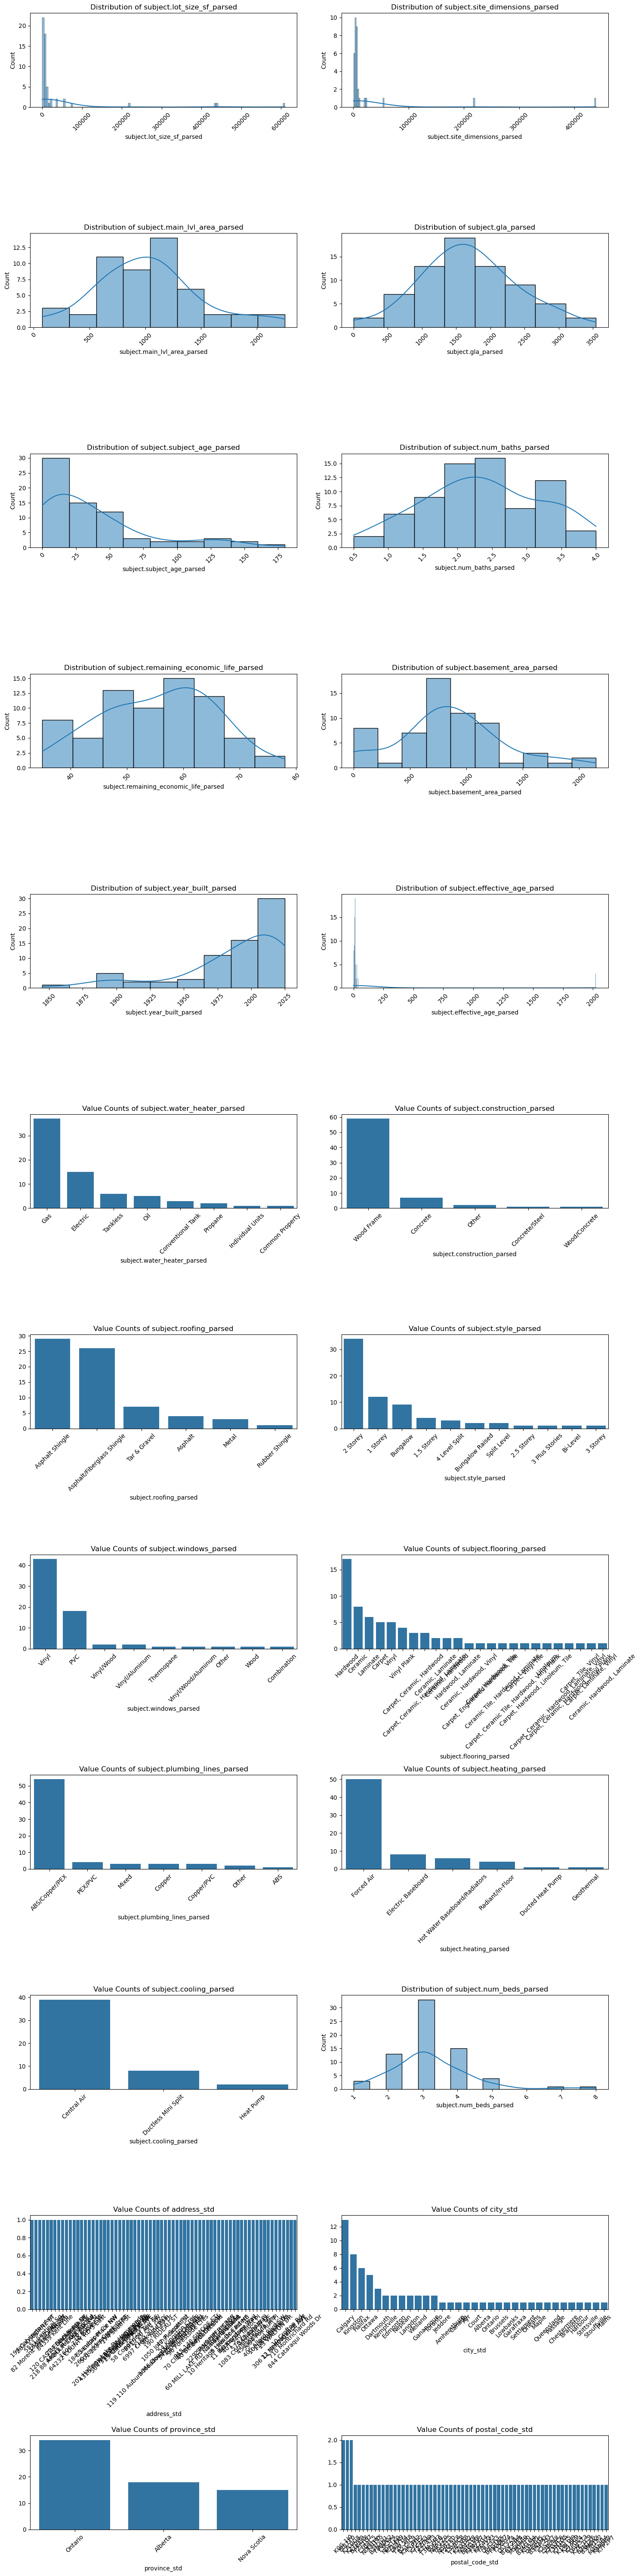

       subject.lot_size_sf_parsed  subject.site_dimensions_parsed  \
count                   57.000000                       33.000000   
mean                 39561.008300                    26771.275943   
std                 114054.400376                    83157.551926   
min                      5.000000                      330.000000   
25%                   3358.000000                     3137.664600   
50%                   6300.000000                     5662.355437   
75%                  12600.000000                     7007.130000   
max                 609840.000000                   439236.942000   

       subject.main_lvl_area_parsed  subject.gla_parsed  \
count                     51.000000           70.000000   
mean                    1026.419020         1680.827670   
std                      475.089386          706.152682   
min                       78.000000            1.000000   
25%                      708.000000         1192.500000   
50%                     

In [71]:
# parsed_columns = [col for col in train_df.columns if 'parsed' in col]
n_cols = 2
n_rows = (len(parsed_columns)+1)//2 
plt.figure(figsize=(15,5*n_rows))
for i,col in enumerate(parsed_columns,1):
    plt.subplot(n_rows,n_cols,i)
    if train_df[col].dtype in ['int64','float64']:
        sns.histplot(data = train_df,x=col,kde = True)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation = 45)
    else:
        value_counts = train_df[col].value_counts()
        sns.barplot(x = value_counts.index, y = value_counts.values)
        plt.title(f'Value Counts of {col}')
        plt.xticks(rotation = 45)
    plt.tight_layout()
plt.show()
numeric_parsed = train_df[parsed_columns].select_dtypes(include = ['int64','float64'])
print(numeric_parsed.describe())

categorical_parsed = train_df[parsed_columns].select_dtypes(exclude = ['int64','float64'])
for col in categorical_parsed:
    print(f"\n{col}")
    print(train_df[col].value_counts().head())

    

#### CLUSTERING

In [72]:
!pip install kneed


In [73]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import KMeans

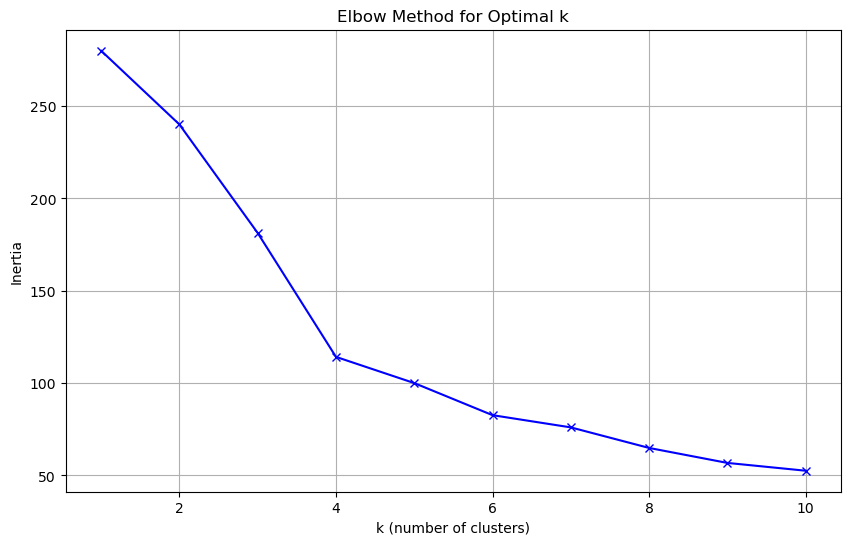


 Optimal number of clusters: 4


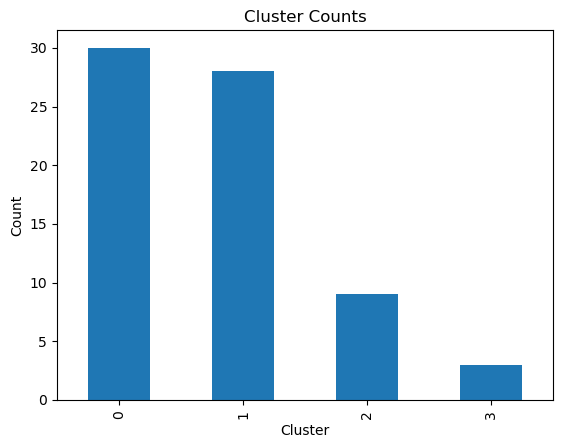

cluster
0    30
1    28
2     9
3     3
Name: count, dtype: int64

In [74]:
numeric_parsed_columns = [
    'subject.num_baths_parsed',
    'subject.num_beds_parsed',
    'subject.effective_age_parsed',
    'subject.remaining_economic_life_parsed'
]
X = train_df[numeric_parsed_columns]
imputer = SimpleImputer(strategy = "median")
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
interias = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    interias.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(k_values,interias,'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

kneedle = KneeLocator(list(k_values),interias,S=1.0,curve = 'convex',direction = 'decreasing')
optimal_k = kneedle.elbow
print(f"\n Optimal number of clusters: {optimal_k}")

kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
cluster_lables = kmeans.fit_predict(X_scaled) 
train_df['cluster'] = cluster_lables
train_df['cluster'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
train_df['cluster'].value_counts().sort_index()

1. y - comps
2. x - (apprasial,property)
3. given an appraisal find the top three propeties
4. evaluate the model - the simlilarity between the top three properties and the comps
5. the similarity score is the performance of the model

In [75]:
train_df.describe()

,orderID,subject.room_count,subject.room_total,subject.second_lvl_area,subject.lot_size_sf_parsed,subject.site_dimensions_parsed,subject.main_lvl_area_parsed,subject.gla_parsed,subject.subject_age_parsed,subject.num_baths_parsed,subject.remaining_economic_life_parsed,subject.basement_area_parsed,subject.year_built_parsed,subject.effective_age_parsed,subject.num_beds_parsed,cluster
count,7.000000e+01,70.000000,70.000000,33.000000,57.000000,33.000000,51.000000,70.000000,70.000000,70.000000,70.000000,61.000000,70.000000,70.000000,70.000000,70.000000
mean,4.764682e+06,7.085714,7.171429,878.376667,39561.008300,26771.275943,1026.419020,1680.827670,38.271429,2.364286,55.685714,860.967213,1986.585714,99.428571,3.185714,0.785714
std,8.966921e+03,1.990869,2.042813,434.098681,114054.400376,83157.551926,475.089386,706.152682,41.027711,0.880223,9.967400,484.001342,41.065340,410.495126,1.170815,0.832194
min,4.723364e+06,4.000000,4.000000,138.000000,5.000000,330.000000,78.000000,1.000000,0.000000,0.500000,35.000000,0.000000,1845.000000,0.000000,1.000000,0.000000
25%,4.759561e+06,6.000000,6.000000,627.000000,3358.000000,3137.664600,708.000000,1192.500000,9.000000,2.000000,48.500000,627.000000,1972.500000,8.000000,3.000000,0.000000
50%,4.763752e+06,7.000000,7.000000,770.000000,6300.000000,5662.355437,1045.370000,1635.500000,22.500000,2.500000,55.000000,819.000000,2002.500000,14.000000,3.000000,1.000000
75%,4.770261e+06,8.000000,8.000000,1152.000000,12600.000000,7007.130000,1202.500000,2127.000000,50.750000,3.000000,64.000000,1094.000000,2016.000000,15.000000,4.000000,1.000000
max,4.778797e+06,15.000000,15.000000,2294.000000,609840.000000,439236.942000,2250.000000,3543.100000,180.000000,4.000000,78.000000,2149.000000,2025.000000,2025.000000,8.000000,3.000000


In [76]:
train_xgboost_df = train_df.copy()
test_xgboost_df = test_df.copy()

properties = train_xgboost_df[['orderID','properties']]
X_train = train_xgboost_df.drop(columns = ['comps','properties'])
y_train  = test_xgboost_df[['orderID', 'comps']]
display(properties)
display(X_train)




,orderID,properties
55,4768126,"[{'id': 46, 'address': '213 MISSION TRAIL Cres..."
73,4777578,"[{'id': 50268, 'address': '45 Arbours Circle N..."
11,4761220,"[{'id': 170103, 'address': '111 Fairmont Avenu..."
30,4758324,"[{'id': 297413, 'address': '6 Shoreline Bluff ..."
40,4759562,"[{'id': 292130, 'address': '1702 Caldwell Road..."
...,...,...
20,4742669,"[{'id': 62579, 'address': '4640 22 Avenue NW '..."
60,4770310,"[{'id': 161701, 'address': '180 Elm Street ', ..."
71,4773833,"[{'id': 126352, 'address': '12 Baker Cres ', '..."
14,4759647,"[{'id': 293598, 'address': '597 Lucasville Roa..."


,orderID,subject.address,subject.subject_city_province_zip,subject.effective_date,subject.municipality_district,subject.site_dimensions,subject.lot_size_sf,subject.year_built,subject.structure_type,subject.roofing,...,subject.flooring_parsed,subject.plumbing_lines_parsed,subject.heating_parsed,subject.cooling_parsed,subject.num_beds_parsed,address_std,city_std,province_std,postal_code_std,cluster
55,4768126,194 Calvington Ave Ottawa ON K2T0H9,Ottawa ON K2T0H9,Apr/23/2025,"Kanata Lakes, City of Ottawa",29.46 F x 98.42 F,2899 SqFt,2016 +/-,Townhouse,Asphalt/Fiberglass Shingle,...,Hardwood,ABS/Copper/PEX,Forced Air,Central Air,3.0,194 Calvington Ave,Ottawa,Ontario,K2T0H9,0
73,4777578,260 Boulder Creek Cres Langdon AB T0J 1X3,Langdon AB T0J 1X3,May/01/2025,"Langdon, AB / Boulder Creek",21.90 m x 40.08 m,878 SqM,2015,Detached,Asphalt/Fiberglass Shingle,...,Hardwood,Mixed,Forced Air,Central Air,3.0,260 Boulder Creek Cres,Langdon,Alberta,T0J 1X3,0
11,4761220,11 Bashir St Maple ON L6A3A3,Maple ON L6A3A3,Apr/14/2025,"Region of York, City of Vaughan",24.96' x 104.92',2619 SqFt,2000,Semi Detached,Asphalt/Fiberglass Shingle,...,Hardwood,Copper,Forced Air,Central Air,3.0,11 Bashir St,Maple,Ontario,L6A3A3,2
30,4758324,3 Bayview Lane Queensland NS B0J1T0,Queensland NS B0J1T0,Apr/09/2025,Queensland,See Schedule A and or Plot Map,12600 SqFt,2008,Detached,Asphalt Shingle,...,Ceramic,ABS/Copper/PEX,Electric Baseboard,Ductless Mini Split,3.0,3 Bayview Lane,Queensland,Nova Scotia,B0J1T0,1
40,4759562,10 Heritage Hills Dr Eastern Passage NS B3G1N5,Eastern Passage NS B3G1N5,Apr/08/2025,Eastern Passage,See Schedule A and or Plot Map,3500 SqFt,1995,Semi Detached,Asphalt/Fiberglass Shingle,...,Laminate,ABS/Copper/PEX,Electric Baseboard,NaN,3.0,10 Heritage Hills Dr Eastern,Passage,Nova Scotia,B3G1N5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,4742669,"504 37 St NW, Calgary, AB T2N 3B8, Canada","Calgary, Alberta, T2N 3B8",Mar/24/2025,"Calgary AB, Parkdale",See Plot Map,431 SqM,1952,Detached,Asphalt/Fiberglass Shingle,...,Hardwood,ABS/Copper/PEX,Forced Air,NaN,2.0,"504 37 St NW, Calgary, AB",Canada,None,T2N 3B8,1
60,4770310,174 South St Gananoque ON K7G1A2,Gananoque ON K7G1A2,Apr/30/2025,Gananoque,54' x 120',6480 SqFt,1900,Detached,Asphalt Shingle,...,"Ceramic, Hardwood",ABS/Copper/PEX,Forced Air,Central Air,3.0,174 South St,Gananoque,Ontario,K7G1A2,0
71,4773833,4315 CONCESSION RD 4 N/A S Amherstburg ON N9V2Y8,Amherstburg ON N9V2Y8,Apr/30/2025,10 - 15 (Amherstburg - Malden Centre),138 x 167,23046 SqFt,1885,Detached,Asphalt/Fiberglass Shingle,...,Ceramic,Copper,Forced Air,Central Air,4.0,4315 CONCESSION RD 4 N/A S,Amherstburg,Ontario,N9V2Y8,0
14,4759647,201 Halfway Lake Dr Hammonds Plains NS B4B1M8,Hammonds Plains NS B4B1M8,Apr/10/2025,Halifax Regional Municipality - Hammonds Plains,See Schedule A and or Plot Map,33943+/-SqFt,1982,Detached,Asphalt Shingle,...,Vinyl Plank,ABS/Copper/PEX,Radiant/In-Floor,NaN,4.0,201 Halfway Lake Dr Hammonds,Plains,Nova Scotia,B4B1M8,1


In [83]:
records = []

for _, row in properties.iterrows():
    orderID = row['orderID']  # get orderID from the row
    props_list = row['properties']  # the list of properties in that row
    
    for prop in props_list:  # each prop is a dict
        prop_record = {
            "orderID": orderID,
            "address": prop.get("address", None),
            "bedrooms": prop.get("bedrooms", None),
            "gla": prop.get("gla", None),
            "city": prop.get("city", None),
            "province": prop.get("province", None),
            "postal_code": prop.get("postal_code", None),
            "property_sub_type": prop.get("property_sub_type", None),
            "structure_type": prop.get("structure_type", None),
            "style": prop.get("style", None),
            "levels": prop.get("levels", None),
            "room_count": prop.get("room_count", None),
            "full_baths": prop.get("full_baths", None),
            "half_baths": prop.get("half_baths", None),
            "main_level_finished_area": prop.get("main_level_finished_area", None),
            "upper_lvl_fin_area": prop.get("upper_lvl_fin_area", None),
            "bg_fin_area": prop.get("bg_fin_area", None),
            "lot_size_sf": prop.get("lot_size_sf", None),
            "year_built": prop.get("year_built", None),
            "roof": prop.get("roof", None),
            "basement": prop.get("basement", None),
            "cooling": prop.get("cooling", None),
            "heating": prop.get("heating", None),
            "close_price": prop.get("close_price", None),
            "close_date": prop.get("close_date", None),
            # "public_remarks": prop.get("public_remarks", None), 
            # "latitude": prop.get("latitude", None),
            # "longitude": prop.get("longitude", None),
        }
    records.append(prop_record)
df = pd.DataFrame(records)

df.head()

,orderID,address,bedrooms,gla,city,province,postal_code,property_sub_type,structure_type,style,...,upper_lvl_fin_area,bg_fin_area,lot_size_sf,year_built,roof,basement,cooling,heating,close_price,close_date
0,4768126,28 Evanshen Crescent,4.0,2250.0,Kanata,Ontario,K2K 2Z6,Detached,"Detached, 2-Storey",2-Storey,...,NaN,None,NaN,NaN,,Finished,Central Air,Forced Air,958000.0,2025-05-09
1,4777578,48 Wilson Road NE,3.0,1334.0,Langdon,Alberta,T0J 1X1,Detached,Detached,Bungalow,...,NaN,None,11325.0,1996.0,Asphalt Shingle,Full,Central Air,"Floor Furnace, Natural Gas",685000.0,2025-05-10
2,4761220,521 Cunningham Drive,5.0,1750.0,Vaughan,Ontario,L6A 2H1,Detached,"Detached, Bungalow",Bungalow,...,NaN,None,NaN,NaN,,Finished,Central Air,Forced Air,1470000.0,2025-05-09
3,4758324,99 Irwin Hubley Road,2.0,1347.0,Nova Scotia,Nova Scotia,B3Z 2Z8,Detached,Single Family,1 Level,...,NaN,None,21357.0,NaN,Asphalt Shingle,"Undeveloped, Partial, Crawl Space","Baseboard, Furnace, Forced Air, Fireplace","Baseboard, Furnace, Forced Air, Fireplace",599900.0,2025-05-09
4,4759562,44 Chater Street,4.0,723.0,Nova Scotia,Nova Scotia,B3G 1N7,Semi-Detached,Single Family,Split Entry,...,NaN,None,3004.0,1996.0,Asphalt Shingle,Fully Developed,"Baseboard, Heat Pump","Baseboard, Heat Pump",460000.0,2025-05-09


In [88]:
records_df = df.rename(columns={col: f"prop.{col}" for col in df.columns if col != "orderID"})
merged_df = train_df.merge(records_df, on='orderID', how='left')
merged_df.columns


Index(['orderID', 'comps', 'properties', 'subject.address',
       'subject.subject_city_province_zip', 'subject.effective_date',
       'subject.municipality_district', 'subject.site_dimensions',
       'subject.lot_size_sf', 'subject.year_built', 'subject.structure_type',
       'subject.roofing', 'subject.effective_age', 'subject.style',
       'subject.construction', 'subject.remaining_economic_life',
       'subject.windows', 'subject.basement', 'subject.exterior_finish',
       'subject.basement_area', 'subject.foundation_walls', 'subject.flooring',
       'subject.plumbing_lines', 'subject.heating', 'subject.fuel_type',
       'subject.water_heater', 'subject.cooling', 'subject.room_count',
       'subject.num_beds', 'subject.room_total', 'subject.main_lvl_area',
       'subject.second_lvl_area', 'subject.gla', 'subject.subject_age',
       'subject.num_baths', 'subject.condition', 'subject.lot_size_sf_parsed',
       'subject.site_dimensions_parsed', 'subject.main_lvl_area_pars

The training dataset will contain appraisal and property pair (Appraisla and Property)
It will classify if it is a comp or not
Merge properties and apprasials as a dataset
Convert comps to a dataset

In [ ]:
cols_to_keep = ['orderID', 'properties'] + [col for col in X_train.columns if 'parsed' in col]

X_train = X_train[cols_to_keep]
print(X_train.columns)

Index(['orderID', 'properties', 'subject.lot_size_sf_parsed',
       'subject.site_dimensions_parsed', 'subject.main_lvl_area_parsed',
       'subject.gla_parsed', 'subject.subject_age_parsed',
       'subject.num_baths_parsed', 'subject.remaining_economic_life_parsed',
       'subject.basement_area_parsed', 'subject.year_built_parsed',
       'subject.effective_age_parsed', 'subject.water_heater_parsed',
       'subject.construction_parsed', 'subject.roofing_parsed',
       'subject.style_parsed', 'subject.windows_parsed',
       'subject.exterior_finish_parsed', 'subject.basement_parsed',
       'subject.foundation_walls_parsed', 'subject.flooring_parsed',
       'subject.plumbing_lines_parsed', 'subject.heating_parsed',
       'subject.cooling_parsed', 'subject.num_beds_parsed'],
      dtype='object')


In [ ]:
records = []
properties = []

In [ ]:
y_train.head()

,orderID,comps
76,4777828,"[{'distance_to_subject': '0.70 KM', 'stories':..."
0,4762597,"[{'distance_to_subject': '0.15 KM', 'prop_type..."
26,4757939,"[{'distance_to_subject': '0.77 KM', 'prop_type..."
22,4755196,"[{'distance_to_subject': '4.01 KM', 'prop_type..."
12,4761433,"[{'distance_to_subject': '11.52 KM', 'prop_typ..."
